In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
%matplotlib notebook

In [3]:
filenames = [f for f in glob.glob("*.fits")]
filenames = list(np.array(filenames)[np.where(np.array([len(s.split('f')) for s in filenames]) == 2)[0]])
len(filenames)

47

In [4]:
SPECTRA = [fits.open(f) for f in filenames]

In [6]:
SPECTRA[0][1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               657362 / length of dimension 1                          
NAXIS2  =                   86 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
EXTNAME = 'optimal '           / Extraction algorithm                           
DATE-EXT= '2019-10-16T12:35:54.412' / Date of extraction                        
PXOFFSET=              -3959.5 / First extracted pixel column on reduced image  
WAVE_CAL= 'LFC     '           / Wavelength Calibration Source                  
BARYMJD =    58710.483923824

In [5]:
times = [fits.open(s)[0].header['MIDPOINT'] for s in filenames]

<IPython.core.display.Javascript object>


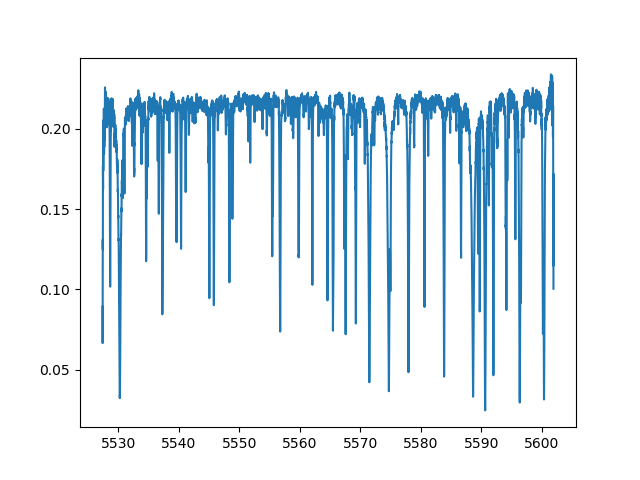

In [8]:
plt.plot(SPECTRA[0][1].data[50][12], SPECTRA[0][1].data[50][1])
plt.show()

<IPython.core.display.Javascript object>


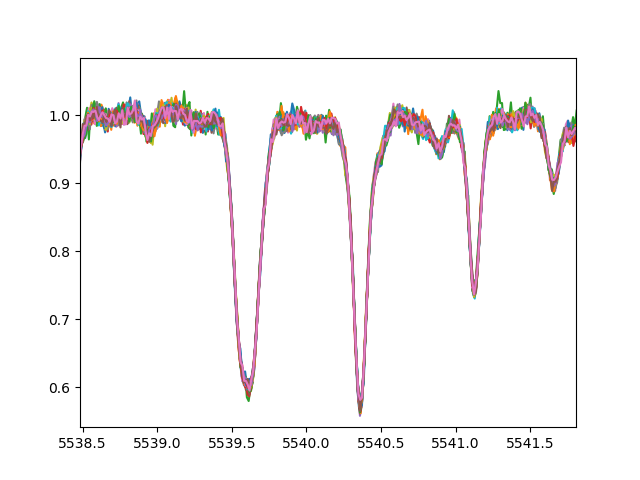

In [6]:
for i in range(len(SPECTRA)):
    plt.plot(SPECTRA[i][1].data[50][12], SPECTRA[i][0].data[50,:])
plt.show()

## How similar are these spectra to SOAP?

In [7]:
soap = pd.read_csv("../SOAP_1pct/integrated_spectrum_full_reso_spot_prot_25.0_size_0.010_lat_0_phase_-0.5000.csv")
soap["Flux"] = soap.Flux.values/np.max(soap.Flux.values)

<IPython.core.display.Javascript object>


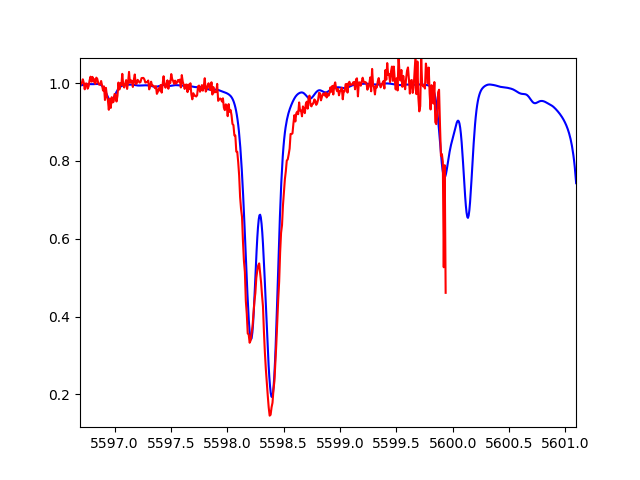

In [8]:
plt.plot(soap.Wavelength.values, soap.Flux.values, c='b')
doppfact = np.sqrt((1-105000/299792458)/(1+105000/299792458))
#for i in range(len(SPECTRA[0][1].data)):
plt.plot(doppfact*SPECTRA[0][1].data[50][12], SPECTRA[0][0].data[50,:], c='r')
#plt.xlim(5260, 5270)
#plt.ylim(0,1)
plt.show()

## How do the tellurics look?

<IPython.core.display.Javascript object>


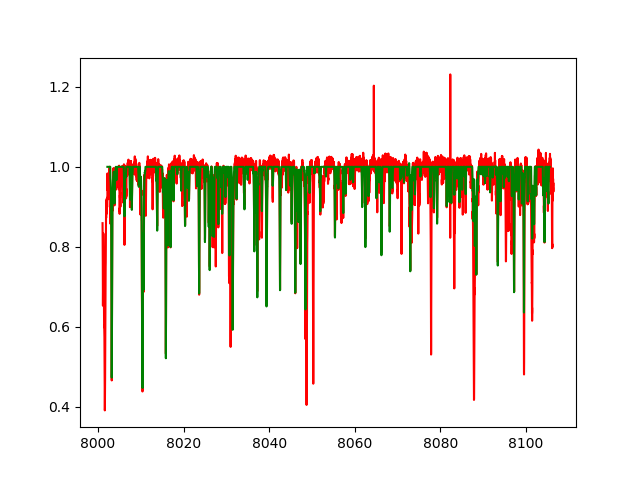

In [24]:
od = 84
plt.plot(SPECTRA[0][1].data[od][12], SPECTRA[0][0].data[od,:], c='r')
plt.plot(SPECTRA[0][1].data[od][12],SPECTRA[0][1].data[od][10], c='g')
plt.show()